<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/Camera_3gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# -- mount google drive
from google.colab import drive
drive.mount("/content/drive")

# -- install geopandas
!pip install geopandas

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 921kB 4.6MB/s 
     |████████████████████████████████| 10.1MB 39.0MB/s 
     |████████████████████████████████| 11.9MB 195kB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=280c81731f593a7f694d4906db51759255ddfbe93d7426b98646854b83d2f2e9
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


**important import**

In [0]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

import pyproj
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import statistics

In [0]:
# -- read in the counts
camera_fname = os.path.join("drive", "My Drive", "lwir", "data", "nycdot", "cams_ft_wd.feather")
camera = pd.read_feather(camera_fname)

In [0]:
# -- extract just the counts
camarr = camera.drop(columns=["cam_id", "lat", "lon"]).values


In [0]:
# -- define gaussian
def gauss(xarr, x0, sig, scl):
  """ Create a 1D Gaussian """
  
#   amp = scl / (sig * np.sqrt(2.0 * np.pi))
  amp = scl
  val = -0.5 * ((xarr - x0) / sig)**2
  
  return amp * np.exp(val)

In [0]:
# -- define model error
def res(param, xval, yval):
  m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, off = param

  model = gauss(xval, m1, sd1, scl1) + gauss(xval, m2, sd2, scl2) + \
            gauss(xval, m3, sd3, scl3) + off
  
  return yval - model

In [7]:
# -- set inital guess
avgs  = [35, 47, 68]
sigs  = [3, 3, 3]
scls  = [5, 5, 5]
off   = [0.5]
param = avgs + sigs + scls + off

print(param)

[35, 47, 68, 3, 3, 3, 5, 5, 5, 0.5]


In [8]:
# -- run the optimization (i.e., model fitting)
cam_len = len(camera)
xval = np.arange(96)

for i in range(cam_len):
 plsq = leastsq(res, param, args=(xval, camarr[i]))
 print(plsq)

(array([36.37055615, 58.54622487, 76.33910541,  2.17262797, 16.57846883,
        4.55756286,  0.3637549 ,  2.6051119 ,  2.21732459,  0.1541813 ]), 1)
(array([34.50897933, 53.69452132, 72.26911449,  4.49107331,  6.82177248,
        6.92095129,  3.26202276,  2.98115688,  5.17021526,  1.3376517 ]), 1)
(array([3.18132121e+01, 6.02351281e+01, 7.59176028e+01, 6.61452898e+00,
       1.26043154e+01, 3.55700881e+00, 2.89957368e-01, 3.92159750e-01,
       2.71571011e-01, 2.55236703e-02]), 1)
(array([35.8987389 , 55.68544304, 74.32118823,  5.49860958, 14.33780161,
        5.444592  ,  3.22415208,  3.59599633,  2.96826206,  0.32383957]), 1)
(array([33.55008407, 49.06579938, 68.87025938,  4.8762739 ,  6.03344913,
        9.51145749,  1.812763  ,  1.03592184,  1.6822776 ,  0.17628731]), 1)
(array([31.8462693 , 49.09043437, 69.45306599,  5.80419304,  9.39962296,
        7.70058706,  1.53445485,  1.07944732,  1.79944262,  0.12115282]), 1)
(array([33.08181874, 49.60518604, 72.59196071,  5.18029232,  9.

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)



(array([3.57996553e+01, 5.36473204e+01, 7.14043431e+01, 4.93163823e+00,
       7.20158366e+00, 5.56112114e+00, 3.63748551e+00, 3.38607297e+00,
       4.70514581e+00, 6.11197937e-02]), 1)
(array([34.66068254, 51.3458293 , 70.9257481 ,  5.58616869,  6.07387462,
        7.18104503,  2.57905635,  2.94182625,  3.663881  ,  0.27793614]), 1)
(array([35.59304796, 51.77749439, 73.27252096,  3.81435732,  6.35872533,
        8.37236634,  1.86921278,  2.86510074,  4.22840836,  0.61341976]), 1)
(array([32.19422532, 47.75640516, 70.29012617,  4.38279242,  7.58210389,
       10.78387589,  2.69965987,  2.24607567,  3.47562319,  0.53494212]), 1)
(array([34.67660759, 48.40183059, 73.45889326,  4.44336382,  2.88131337,
       13.79905445,  0.34812715,  0.27339383,  0.31688092,  0.32601771]), 1)
(array([34.08028274, 52.49836012, 71.14653216,  6.36096922,  7.11159958,
        7.15833866,  1.46935964,  1.92331087,  2.09584985,  0.21985639]), 1)
(array([33.48780787, 60.48261239, 75.27563985,  3.81498367, 17

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


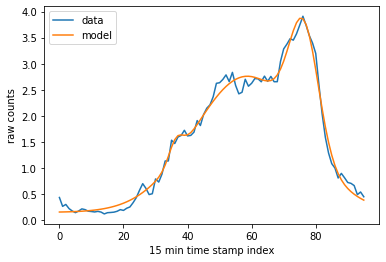

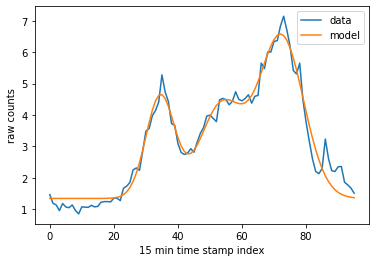

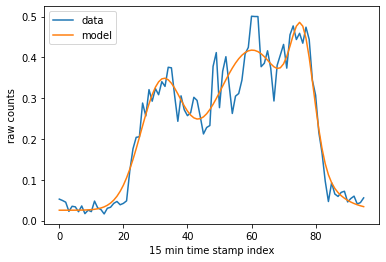

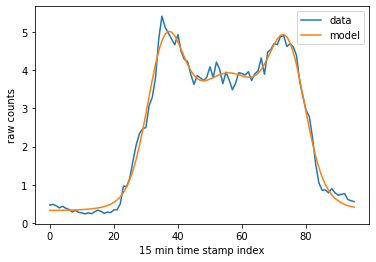

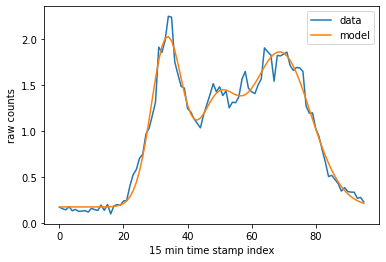

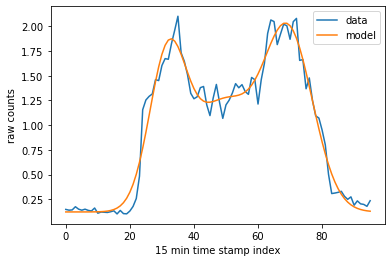

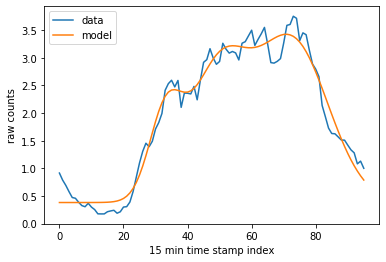

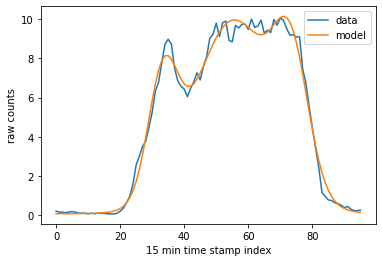

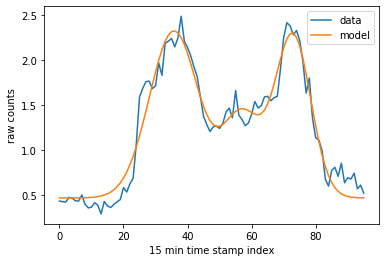

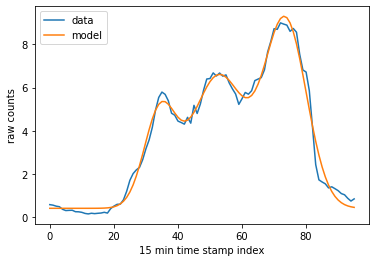

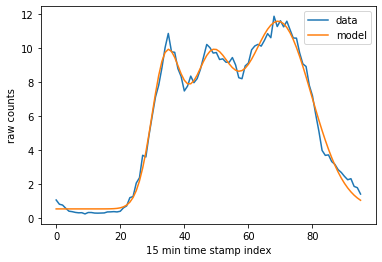

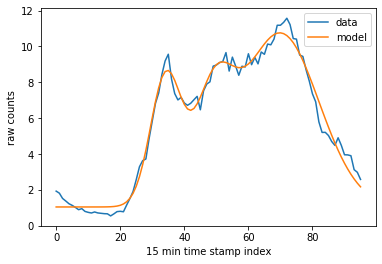

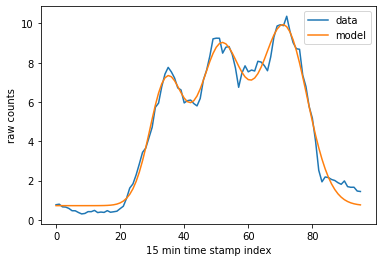

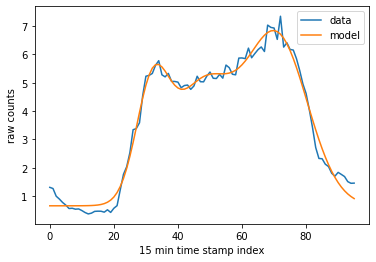

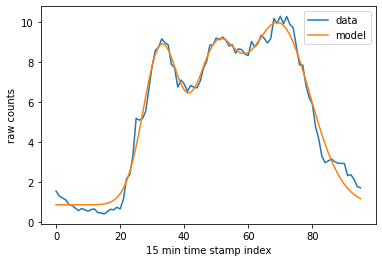

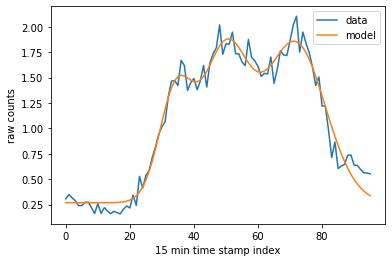

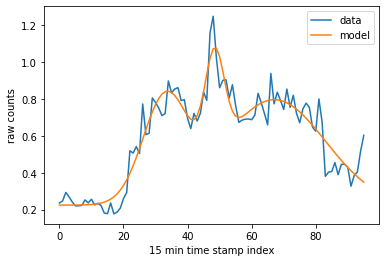

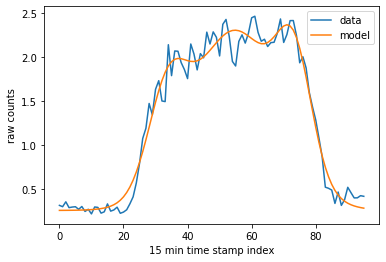

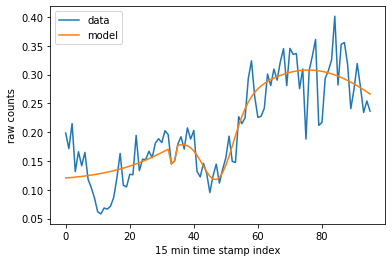

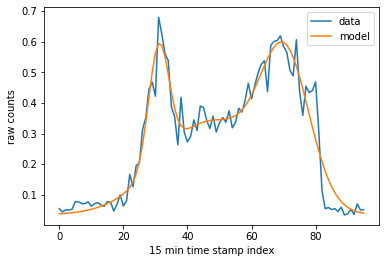

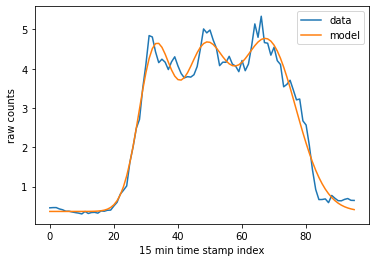

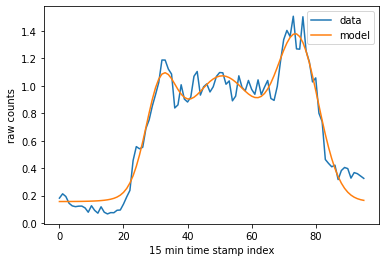

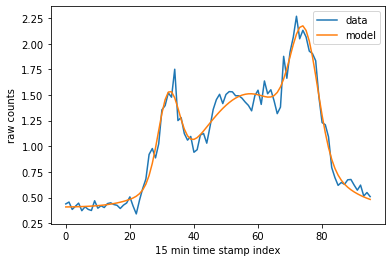

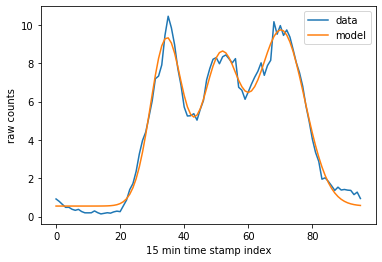

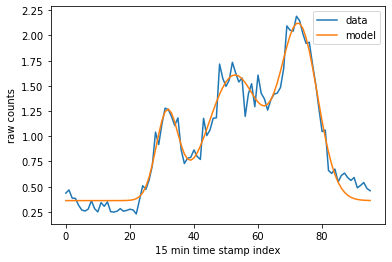

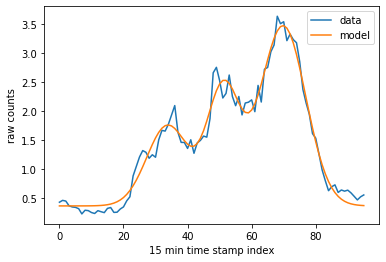

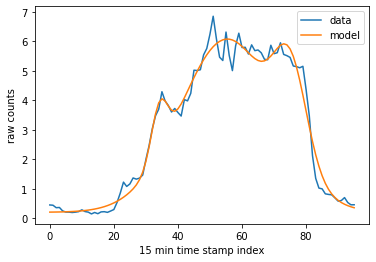

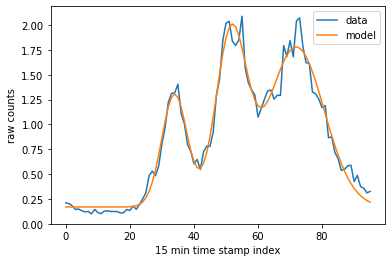

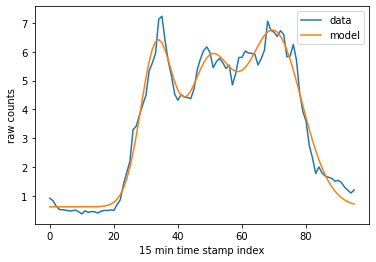

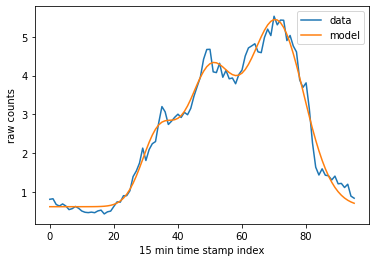

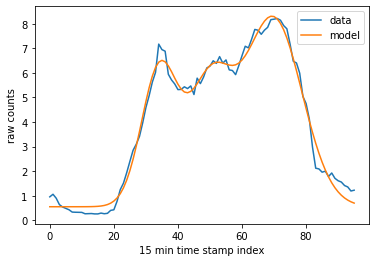

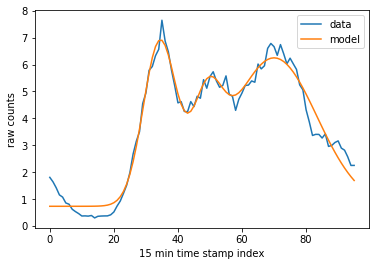

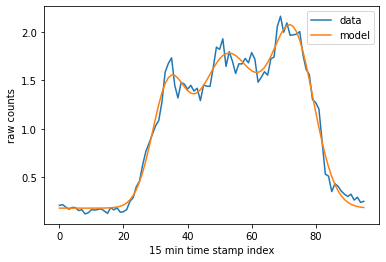

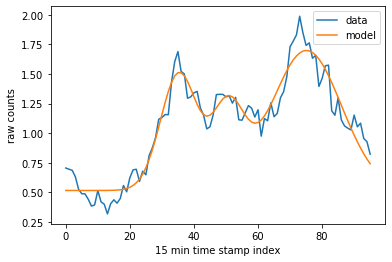

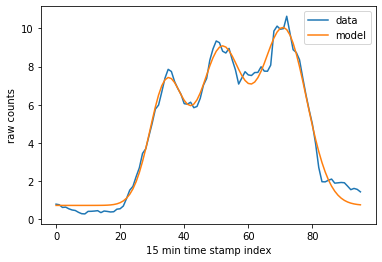

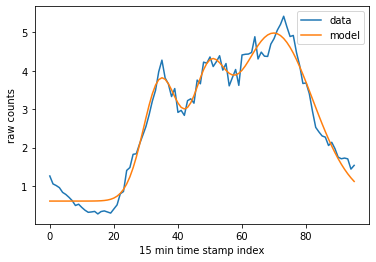

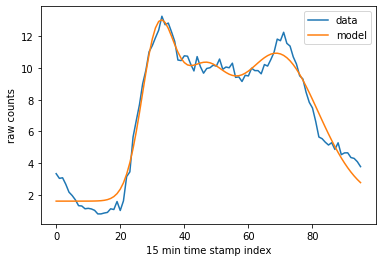

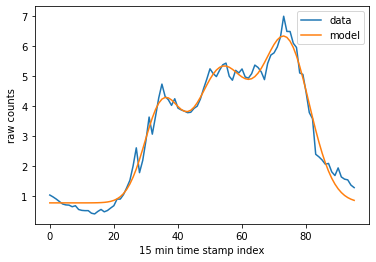

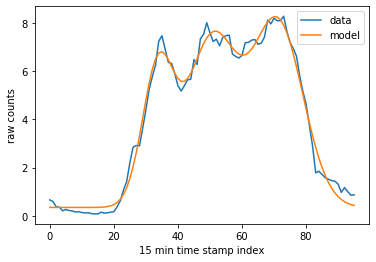

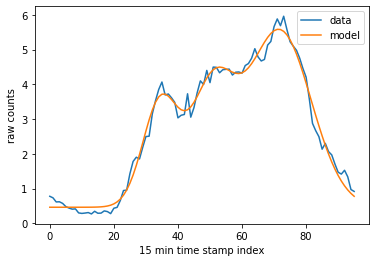

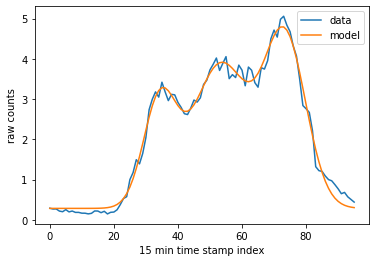

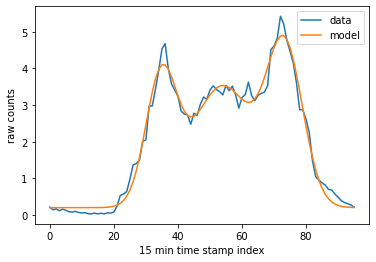

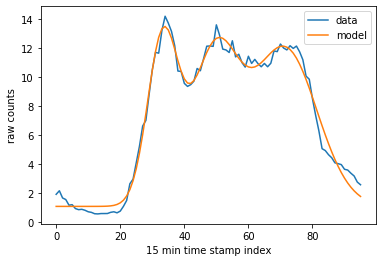

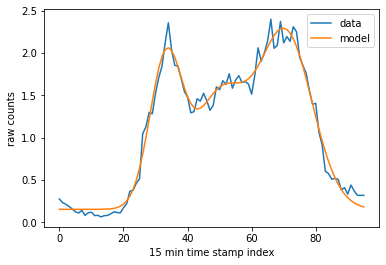

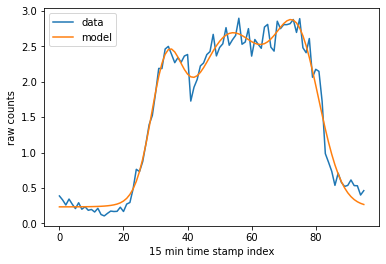

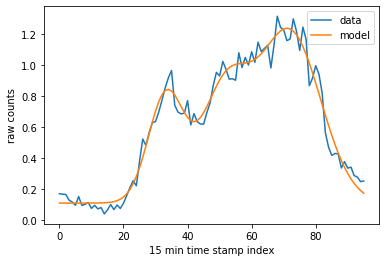

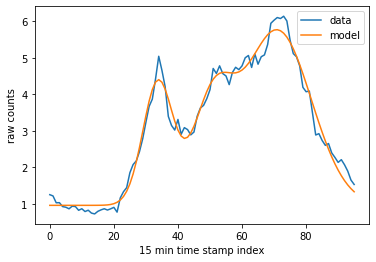

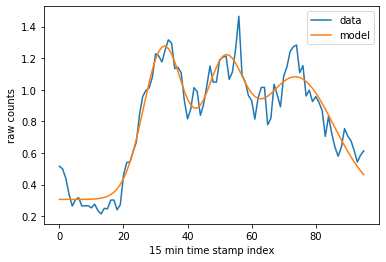

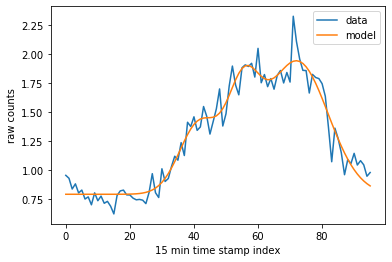

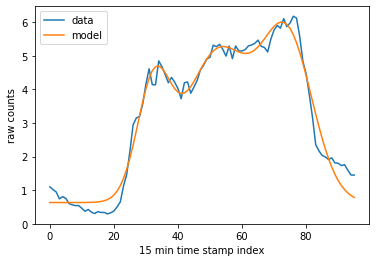

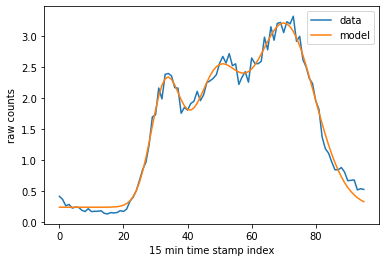

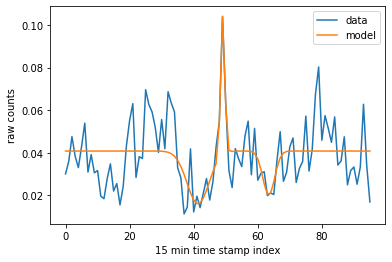

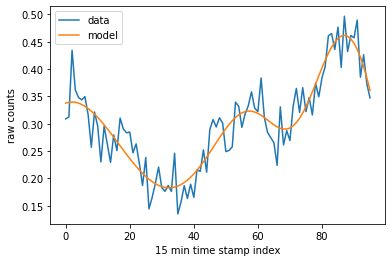

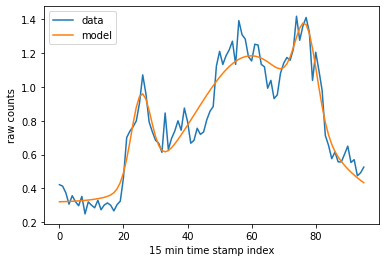

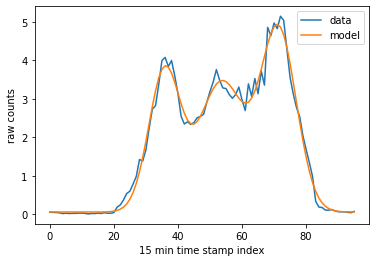

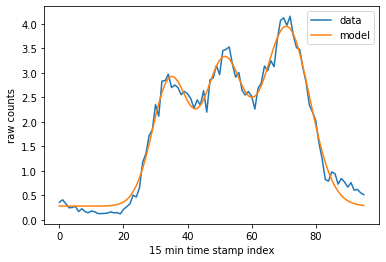

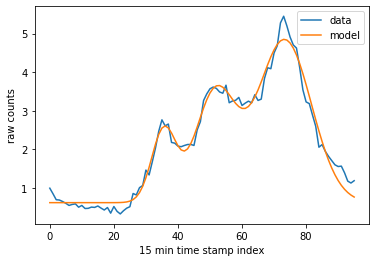

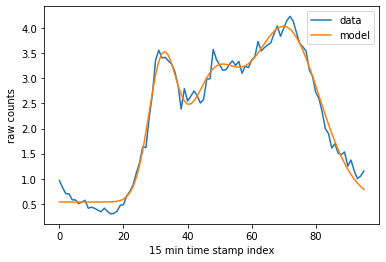

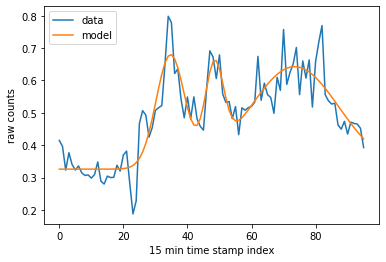

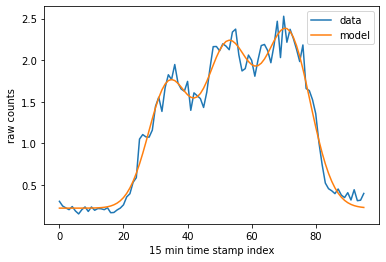

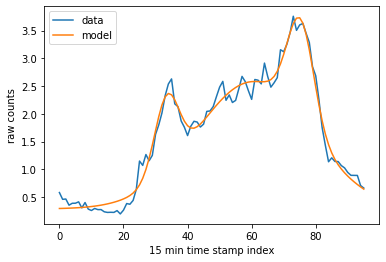

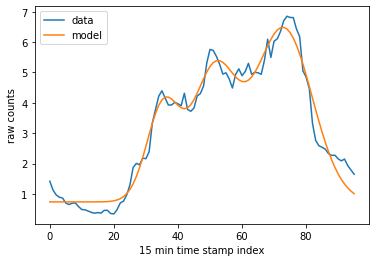

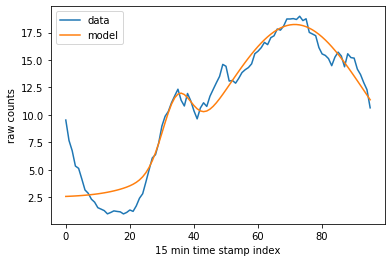

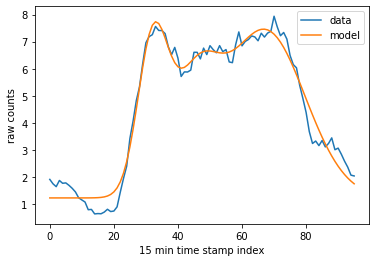

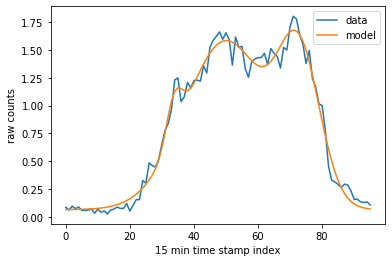

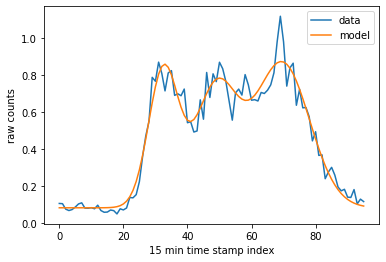

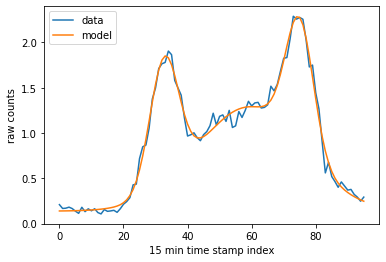

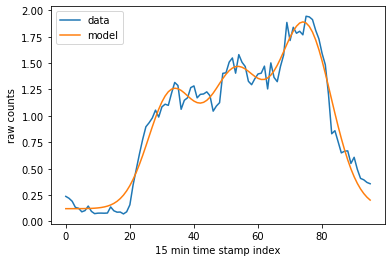

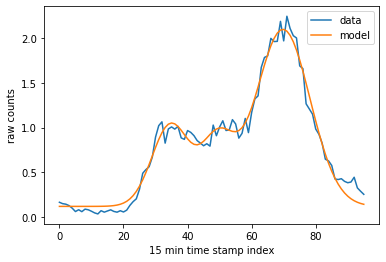

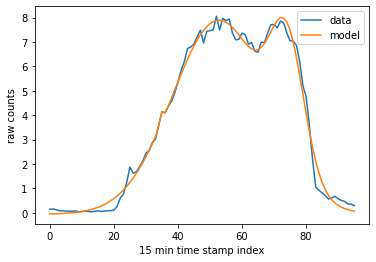

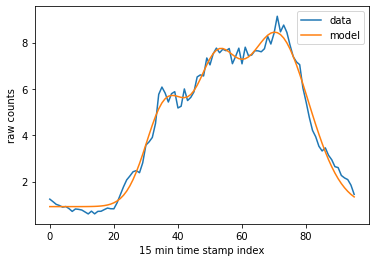

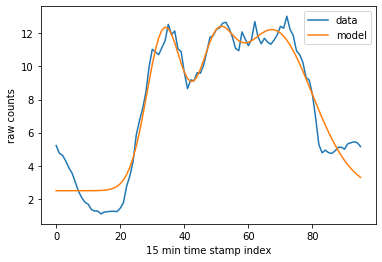

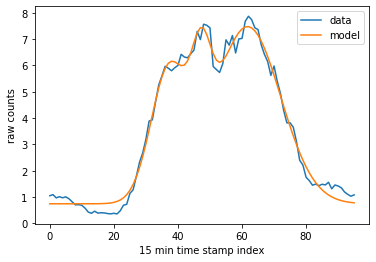

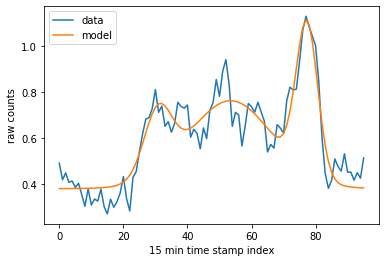

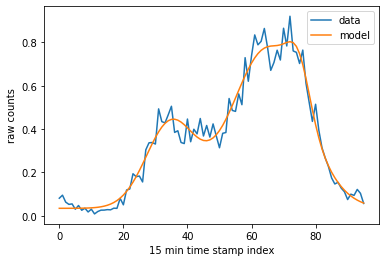

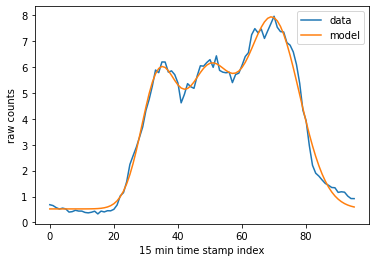

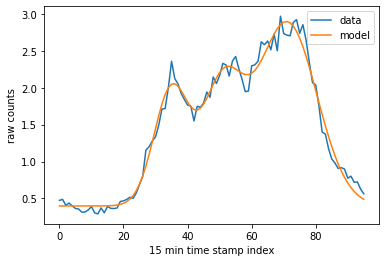

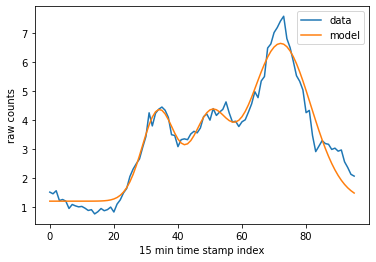

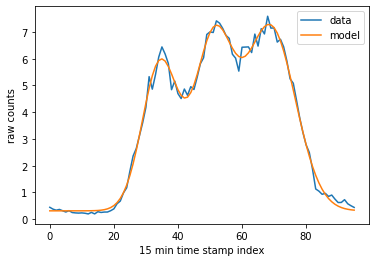

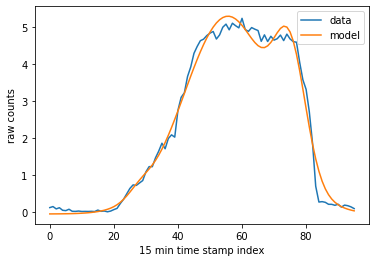

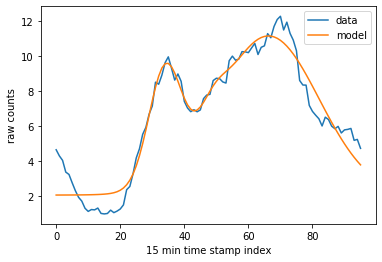

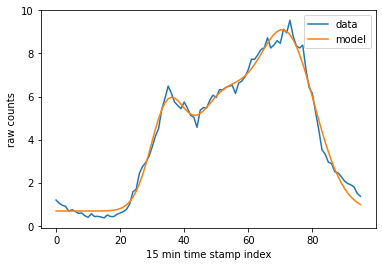

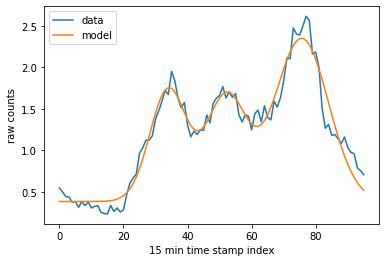

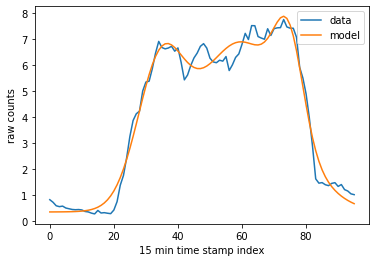

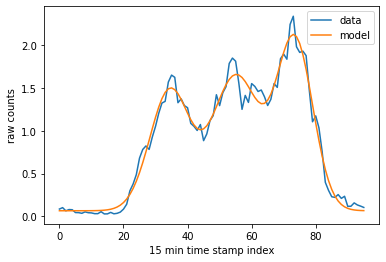

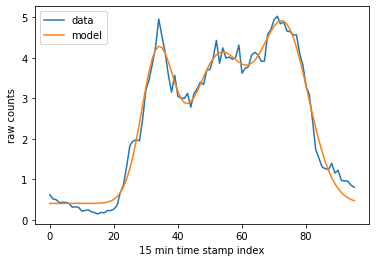

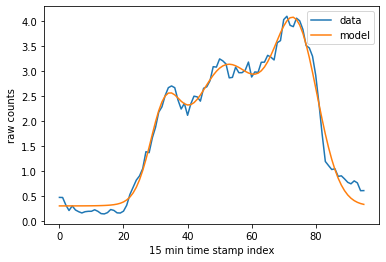

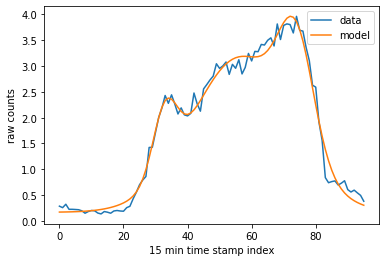

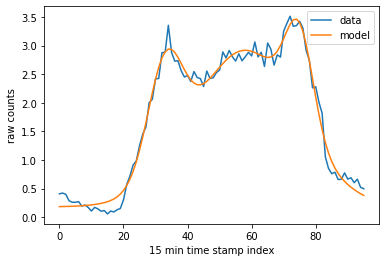

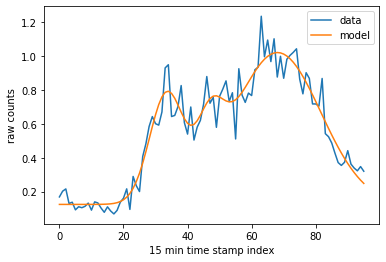

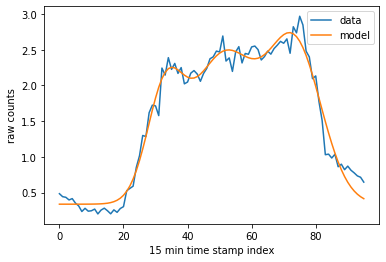

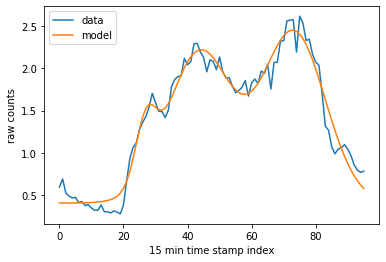

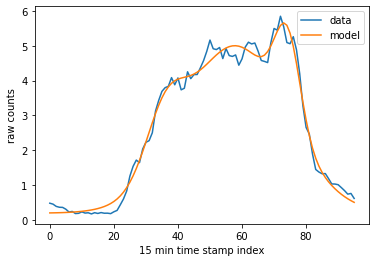

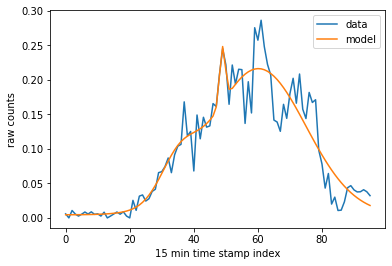

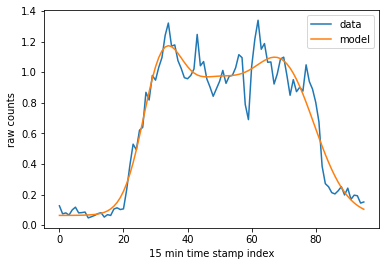

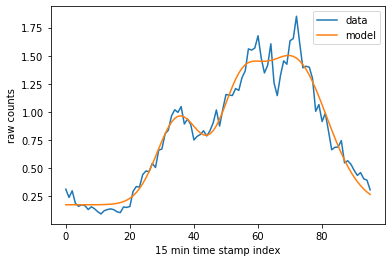

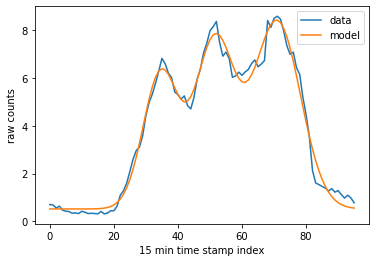

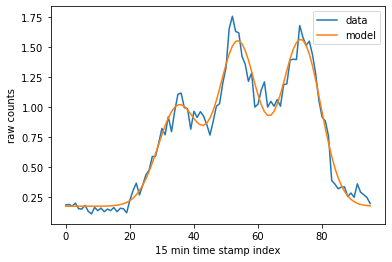

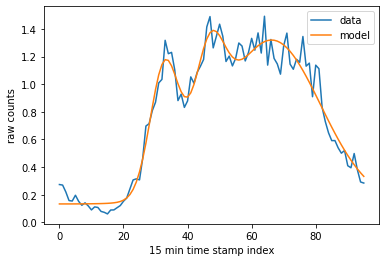

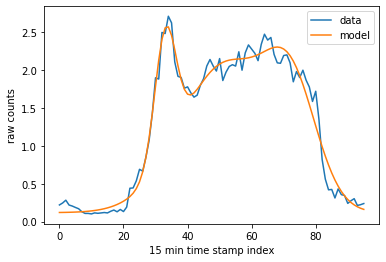

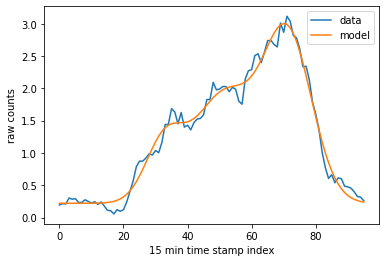

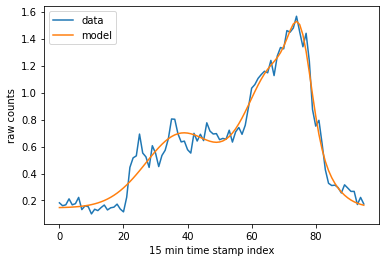

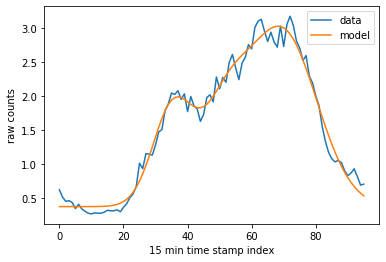

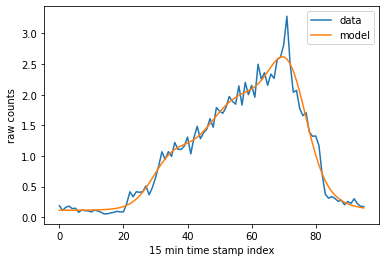

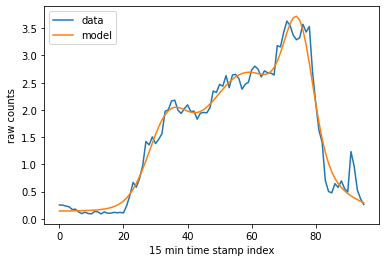

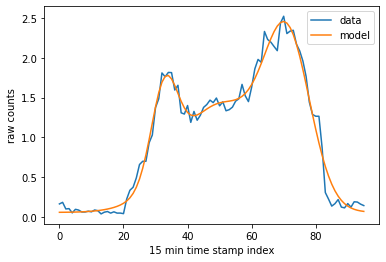

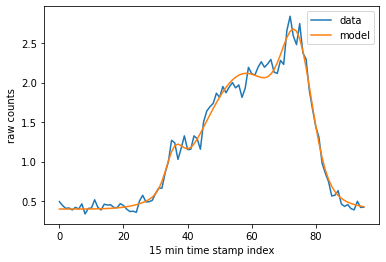

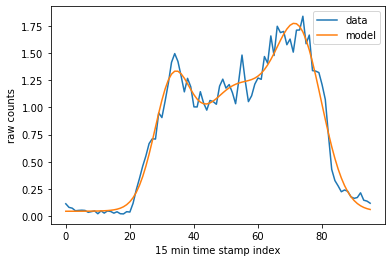

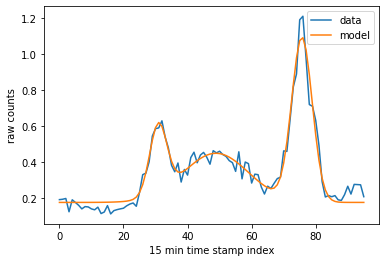

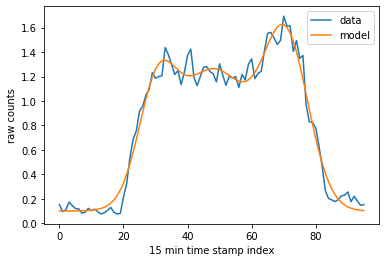

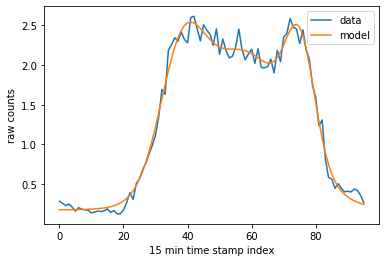

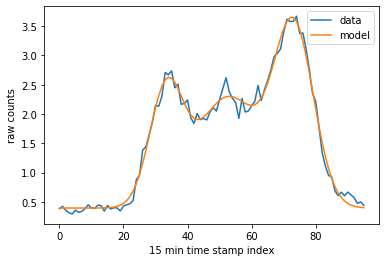

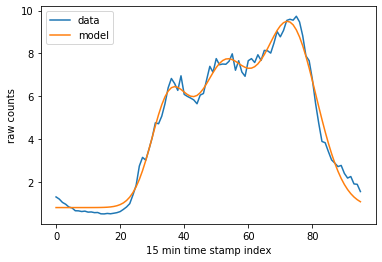

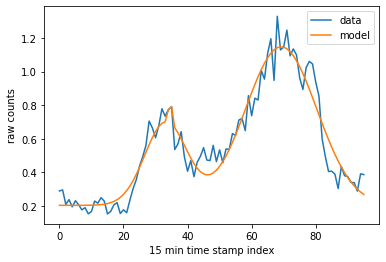

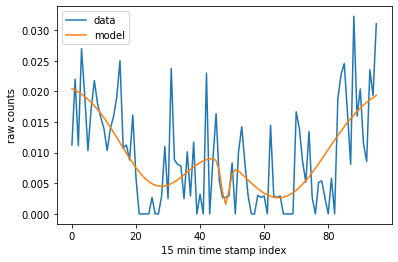

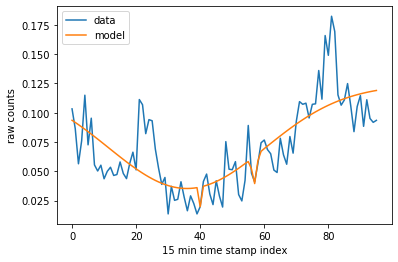

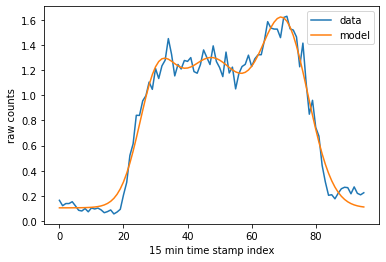

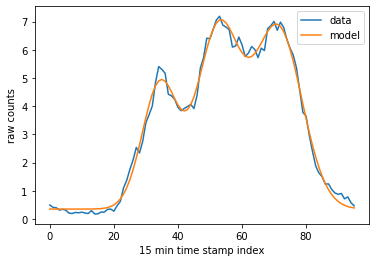

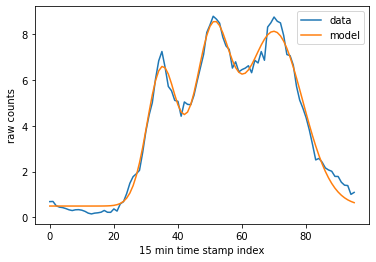

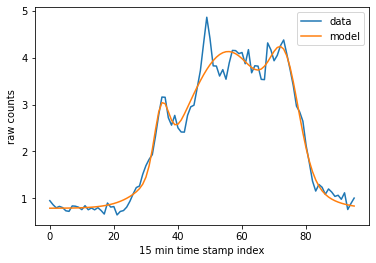

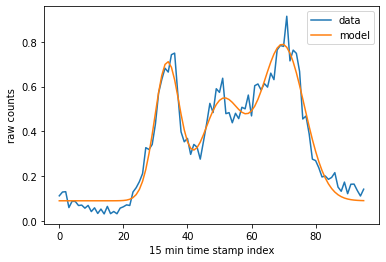

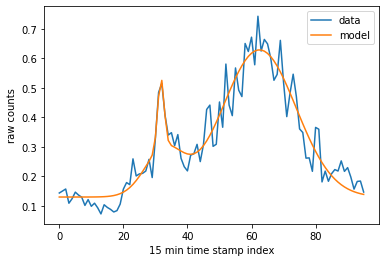

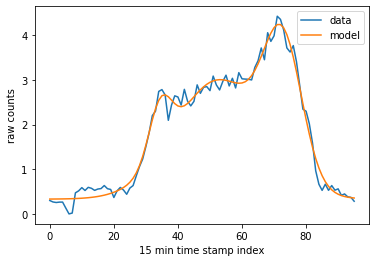

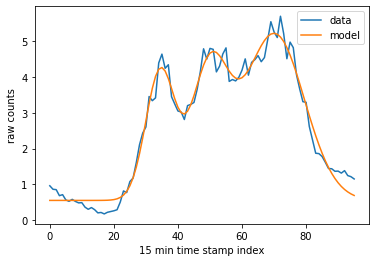

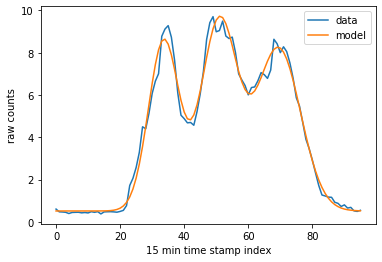

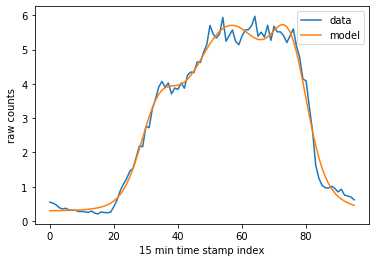

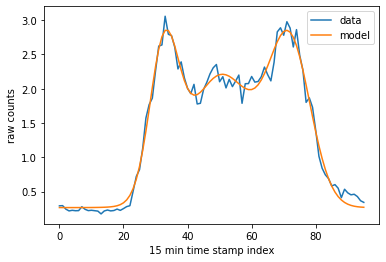

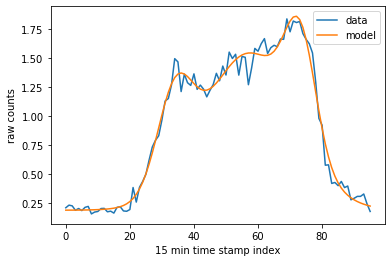

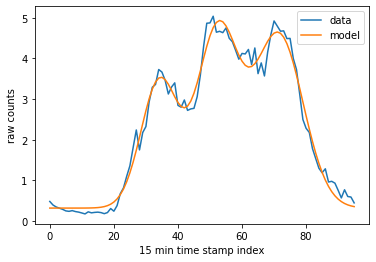

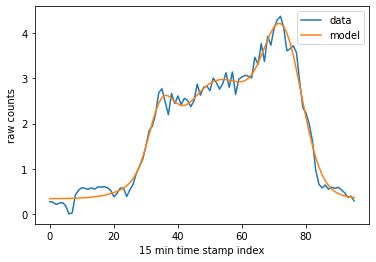

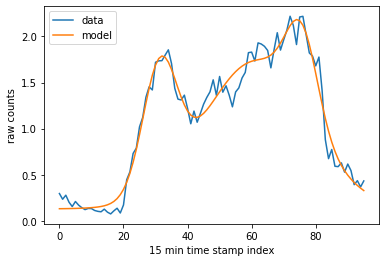

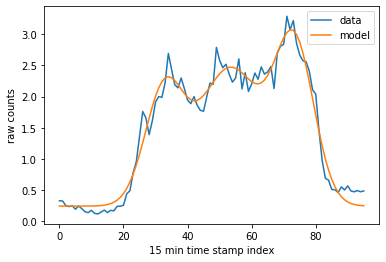

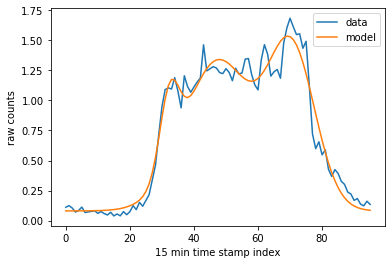

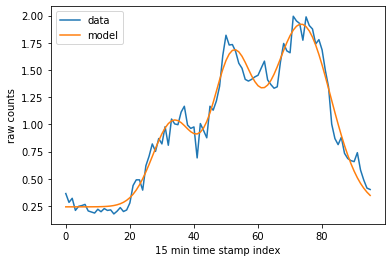

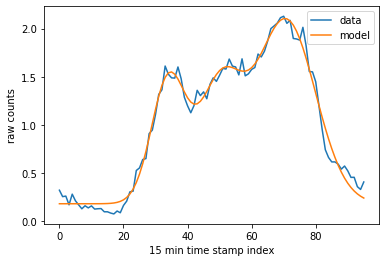

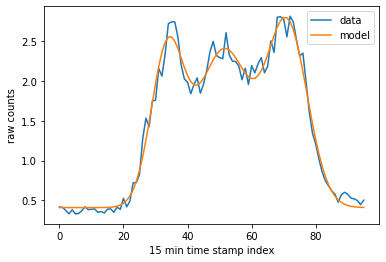

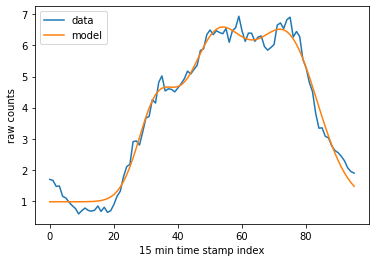

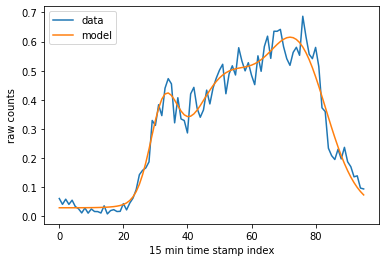

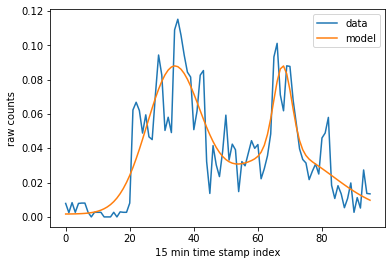

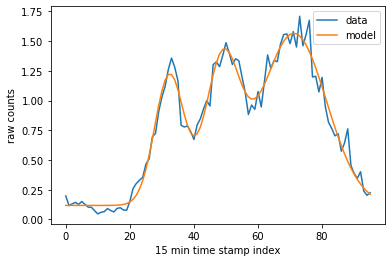

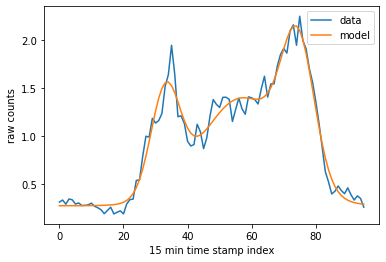

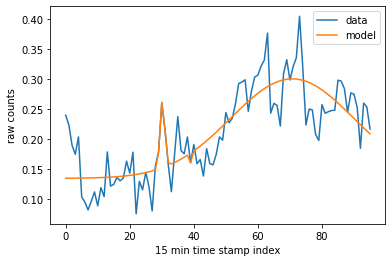

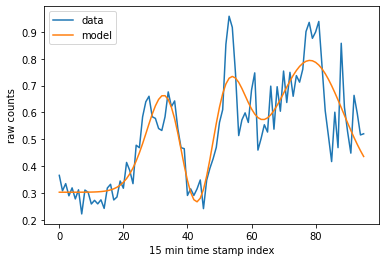

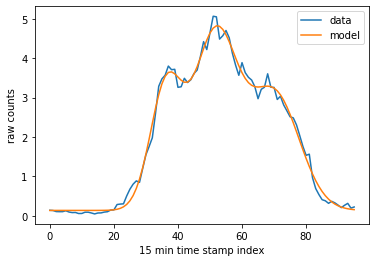

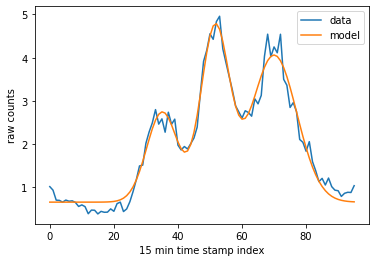

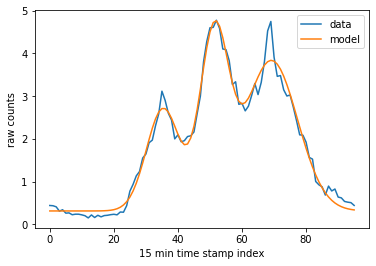

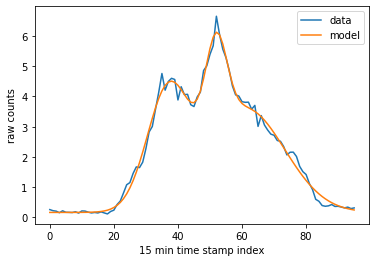

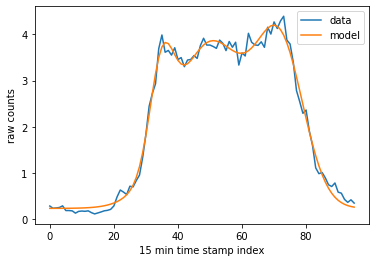

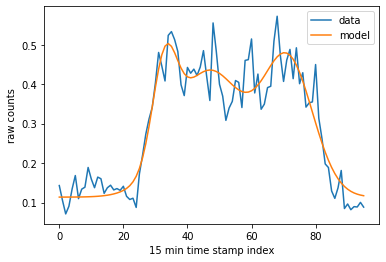

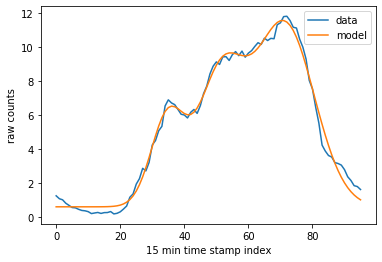

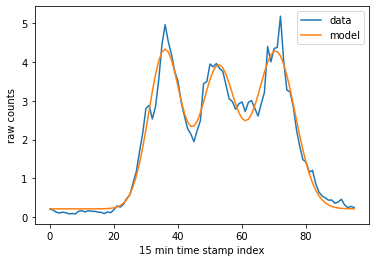

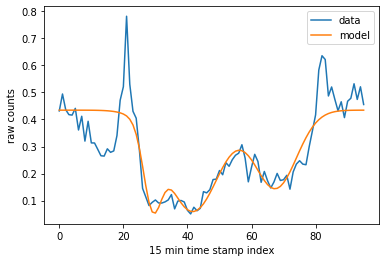

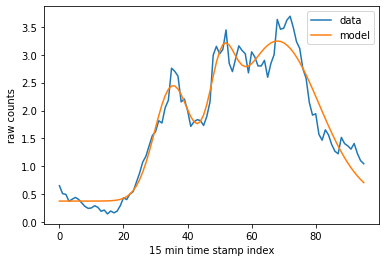

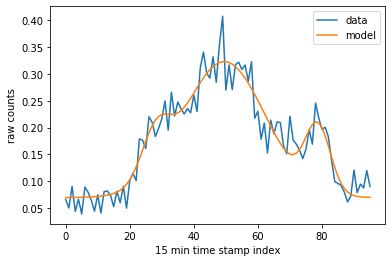

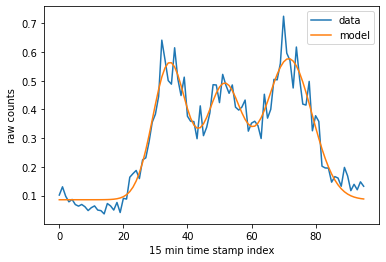

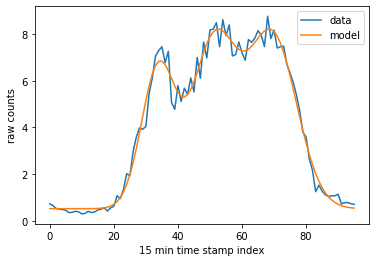

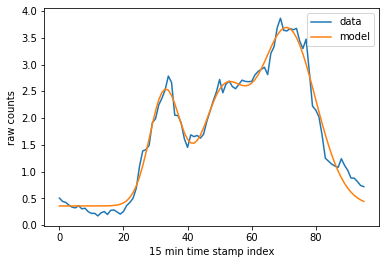

In [9]:
# -- run the optimization (i.e., model fitting)
cam_len = len(camera)
xval_final = np.arange(96)
plsq_final = []                       #定义一个空数组，用来存每个camera的plsq值，最后结果是个二维数组 [[a,b,c,d,...], [a,b,c,d,...]]

for i in range(cam_len):
  
  plsq_final.append(leastsq(res, param, args=(xval_final, camarr[i])))

#print(plsq_)

def huatu(plsq, i):
  m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, off = plsq
  model = gauss(xval_final, m1, sd1, scl1) + gauss(xval_final, m2, sd2, scl2) + gauss(xval_final, m3, sd3, scl3) + off
  plt.plot(xval_final, camarr[i], label="data")
  plt.plot(xval_final, model, label="model")
  plt.xlabel("15 min time stamp index")
  plt.ylabel("raw counts")
  plt.legend()
  plt.show()      #call show()让每次循环都重新画一个新图
  

for i in range(len(plsq_final)):
  huatu(plsq_final[i][0], i)

  



True
[2.0186219842370146, 0.7070855614395594, 1.396758435139824, 1.1614198449211952, 0.5927953091890706, 0.647558797276292, 1.0685302914153558, 1.643532767109412, 0.5037582272339688, 0.9475587787340949, 0.8046935391144626, 0.6494518161799444, 1.0491851769704252, 0.8638206252930142, 0.81414594741427, 1.1295408294012845, 0.9150357578678159, 1.8336975660410257, -3.5791665222490345, 0.7227259947972605, 0.9227576706416551, 1.0499692265004916, 1.151538223274708, 0.8626013978383987, 0.9715213124632633, 0.9037003792143552, 2.42501412652171, 1.2584156025159403, 0.8305690740837122, 1.0259707342533266, 0.7463833422390427, 0.5254005990977516, 1.129237210341371, 0.6248661049271828, 1.0431349052577268, 0.6710990203090657, 0.7279549988022469, 1.04669586791601, 1.0483885566218953, 0.8281470183746823, 1.0436852697889216, 0.8576592627459998, 0.9363179351671423, 0.6997986117753664, 1.3407104450022176, 0.7962900785683616, 0.6457075989639338, 0.8819381753609514, 0.8777835897766186, 1.1097225826180754, 0.84

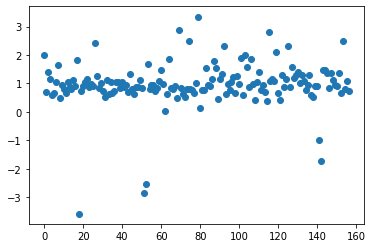

In [10]:
#make a scatter plot of srat = scl2 / (0.5 * (scl1 + scl3)) as a function of park area.

for i in range(len(plsq_final)):
  plsq = plsq_final[i][0]
  m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, off = plsq
print(m1 < m2 < m3)
  
srat_final = []


for i in range(len(plsq_final)):
  plsq = plsq_final[i][0]
  m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, off = plsq
  srat = scl2 / (0.5 * (scl1 + scl3))
  srat_final.append(srat)
  

print(srat_final)
plt.scatter(range(len(srat_final)), srat_final)


**Important definition**

In [0]:
camera_fname = os.path.join("drive", "My Drive", "lwir", "data", "nycdot", "cams_ft_wd.feather")
camera = pd.read_feather(camera_fname)
cam_len = len(camera)

# -- define helper function for integrating within a circle
def integrate_geodata(geo, vals, lat, lon, rad):
  
  # -- convert lat/lon to NY State Plane
  ll_nyspd = pyproj.Proj(init="epsg:2263", preserve_units=True)(lon, lat)
  
  # -- define a circle
  circ = Point(ll_nyspd[0], ll_nyspd[1]).buffer(rad)
  
  # -- calculate the intersection of the circle with the geometry
  inter = geo.intersection(circ)
  
  # -- determine the overlap fraction
  frac = inter.area / geo.area
  return (frac * vals).sum() 

def convert_to_nyc(data):
  if (data.geometry.crs["init"] != "epsg:2263"):
    data.geometry = data.geometry.to_crs(epsg=2263)

**get the park area within 500 ft**

init park epsg:  {'init': 'epsg:4326'}
converted park epsg:  {'init': 'epsg:2263', 'no_defs': True}


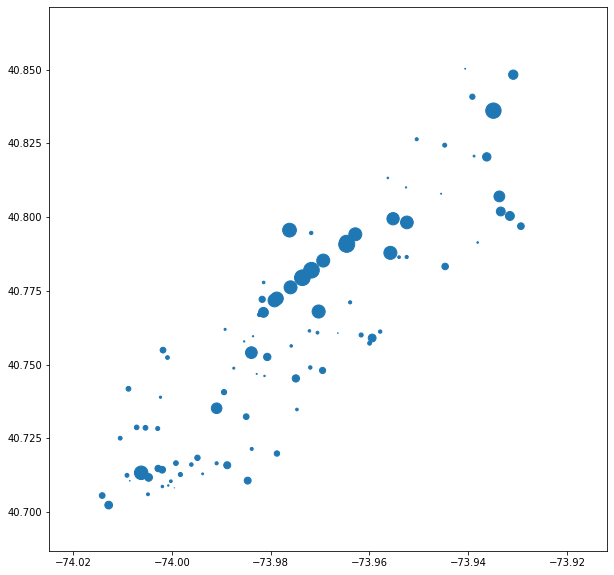

In [12]:
# for each camera:
park_fname = os.path.join("drive", "My Drive", "lwir", "data", "parks", "properties", "geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")
park_data = gp.read_file(park_fname)
print("init park epsg: ", park_data.geometry.crs)

convert_to_nyc(park_data)
print("converted park epsg: ", park_data.geometry.crs)

# -- get the parks area within a radius
park_area = np.array([integrate_geodata(park_data.geometry, park_data.area, camera.lat[i], camera.lon[i], 500.) for i in range(cam_len)])

plt.figure(figsize=(10, 10))
plt.scatter(camera.lon, camera.lat, s=park_area/2000.)

**Get the w and w+r in Manhattan within 500ft**

In [13]:
wname = "drive/My Drive/lwir/data/nyc_ratio/ny_wac_S000_JT00_2017.csv"
rname = "drive/My Drive/lwir/data/nyc_ratio/ny_rac_S000_JT00_2017.csv"
wdata = pd.read_csv(wname)
rdata = pd.read_csv(rname)
wdata.rename(columns = {'w_geocode': 'GEOID10'}, inplace=True)
rdata.rename(columns = {'h_geocode': 'GEOID10'}, inplace=True)
lehd = pd.merge(wdata[["GEOID10", "C000"]], rdata[["GEOID10", "C000"]], 
               on="GEOID10", suffixes=["_w", "_h"], how="outer").fillna(0)
lehd["total_p"] = lehd["C000_w"] + lehd["C000_h"]

dpath   = os.path.join("drive", "My Drive", "lwir", "data", "nyc_ratio", "tl_2019_36_tabblock10/tl_2019_36_tabblock10.shp")
ct_full = gp.read_file(dpath)

# -- convert geographic ID to integer
ct_full["GEOID10"] = ct_full["GEOID10"].astype(int)

# -- sub-select only New York City Counties
cnums  = ["061"]
ind    = ct_full.COUNTYFP10.isin(cnums)
ct_nyc = ct_full[ind]

# -- merge LEHD data and geographic data
lehd_ct = ct_nyc.merge(lehd, on="GEOID10")
print("init w+r epsg: ", lehd_ct.geometry.crs)
convert_to_nyc(lehd_ct)
print("converted w+r epsg: ", lehd_ct.geometry.crs)
wrtot_manhattan = np.zeros(cam_len)
working_manhattan = np.zeros(cam_len)
residents_manhattan = np.zeros(cam_len)
for i in range(cam_len):
  wrtot_manhattan[i] = integrate_geodata(lehd_ct.geometry, lehd_ct.total_p, camera.lat[i], 
                                camera.lon[i], 500.)
 
  working_manhattan[i] = integrate_geodata(lehd_ct.geometry, lehd_ct.C000_w, camera.lat[i], 
                                camera.lon[i], 500.)
  residents_manhattan[i] = integrate_geodata(lehd_ct.geometry, lehd_ct.C000_h, camera.lat[i], 
                               camera.lon[i], 500.)

init w+r epsg:  {'init': 'epsg:4269'}
converted w+r epsg:  {'init': 'epsg:2263', 'no_defs': True}


In [14]:
print(wrtot_manhattan)
print(working_manhattan)
print(residents_manhattan)

[ 5239.60535554 20547.88037979  5583.41576666  4139.69500998
  2748.49375924  5910.36327884   714.50445959 12288.99857235
  2126.54434573 12189.36760978 19951.03317213 23219.88075632
 26518.27727781 13969.08475144 16691.11164466  2448.82615589
   977.45072903  1171.32095502   356.85377447   850.76926289
  1852.34221468  1996.4073311   3650.87106095 25021.77620021
  8940.99228975  9857.63996101 15883.10853677 12389.01255308
 29452.28998337 14458.02955905 17123.91040683 26385.1468584
  1157.52601369  4963.41604101 45986.7681769   4919.02907018
 23914.55836328  4180.00340884 17730.8988758   4596.37509964
  4251.99246348 15147.70859888 29958.64706645   675.4973096
  1604.74939722  1423.13901977  7791.33241361  2377.57058865
   650.13542902  6148.79346274  5305.65818633   422.96017259
  2088.20027355  2385.99904751  1654.29859999  8652.55976835
  4615.02098505  2176.57503115  2450.63788371  6540.64688512
 10950.58287788  4057.07091897 46231.88549793 45993.0624774
  1234.10558728  1327.89291

**plot srat vs park area within 500 ft**

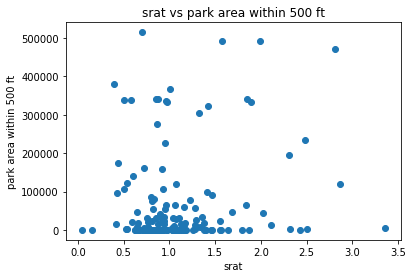

In [32]:
plt.title('srat vs park area within 500 ft')
plt.xlabel('srat')
plt.ylabel('park area within 500 ft')

srat_nonzero = []
park_area_nonzero = []

for i in range(len(camera)):
  if srat_final[i] >= 0:
    srat_nonzero.append(srat_final[i])
    park_area_nonzero.append(park_area[i])
    
plt.scatter(srat_nonzero, park_area_nonzero)


**plot srat vs w+r within 500 ft**

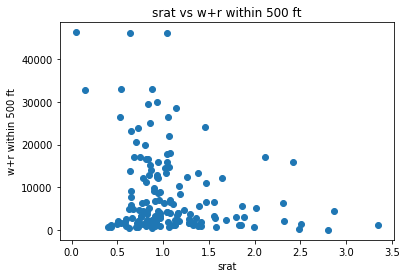

In [33]:
plt.title('srat vs w+r within 500 ft')
plt.xlabel('srat')
plt.ylabel('w+r within 500 ft')

srat_nonzero = []
wrtot_manhattan_nonzero = []

for i in range(len(camera)):
  if srat_final[i] >= 0:
    srat_nonzero.append(srat_final[i])
    wrtot_manhattan_nonzero.append(wrtot_manhattan[i])
    
plt.scatter(srat_nonzero, wrtot_manhattan_nonzero)



**plot srat vs w within 500 ft**

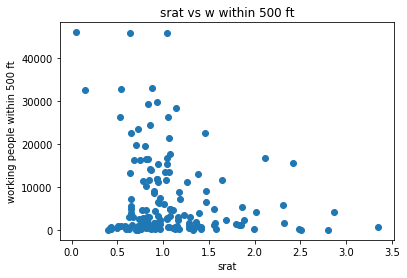

In [34]:
plt.title('srat vs w within 500 ft')
plt.xlabel('srat')
plt.ylabel('working people within 500 ft')

srat_nonzero = []
working_manhattan_nonzero = []

for i in range(len(camera)):
  if srat_final[i] >= 0:
    srat_nonzero.append(srat_final[i])
    working_manhattan_nonzero.append(working_manhattan[i])
    
plt.scatter(srat_nonzero, working_manhattan_nonzero)



**plot srat vs residents within 500 ft**

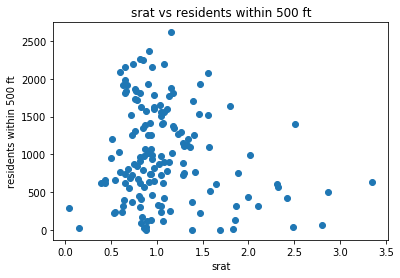

In [35]:
plt.title('srat vs residents within 500 ft')
plt.xlabel('srat')
plt.ylabel('residents within 500 ft')

srat_nonzero = []
residents_manhattan_nonzero = []

for i in range(len(camera)):
  if srat_final[i] >= 0:
    srat_nonzero.append(srat_final[i])
    residents_manhattan_nonzero.append(residents_manhattan[i])
    
plt.scatter(srat_nonzero, residents_manhattan_nonzero)

